# Multiple starting points

We note that usually the results from the optimization algorithm depends on the initial guess, especiallly when the function to optimize has multiple local minima.
In the case where there are multiple local minima on cost contour, we might want to use several trial starting points to find those minima.
In this example, we want to show how user can define custom class to choose starting points and to use multiple initial guess' in the optimization algorithm.
The comparison to the results will be done internally.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from profile_likelihood import profile_likelihood
import model_trigonometric as model
import manifold

%matplotlib inline

## Define the model

The model is defined as the sum of trigonometric functions, in the form of
$$ f\left(t; \vec{\theta}\right) = \sin(\theta_0 t) + \cos(\theta_1 t), $$
where we sample at 3 time points $t = [1.0, 1.2, 2.0]^T$.
The default parameters are chosen to be $\vec{\theta} = [1.0, 2.5]^T$.
The data is set to be the predictions of the model at the default parameters and the standard deviation is chosen to be 30% of the data.
The implementation of this model is given in `model_trigonometric.py`.

In [2]:
# Define the variables from model
best_fit = model.best_fit
param_names = model.param_names
nparams = model.nparams
npred = model.npred


# Define the likelihood object
likelihood = profile_likelihood(model.residuals, nparams, npred)

## Plot the cost contour

In [3]:
# Get cost contour data
Theta0, Theta1, Cost = manifold.cost_contour_data(
    model.cost,
    xlist=np.linspace(-5, 5, 100),
    ylist=np.linspace(-5, 5, 100),
)

In [4]:
ax, clb = manifold.plot_cost_contour(Theta0, Theta1, Cost, levels=25, scale="log")
ax.plot(best_fit[0], best_fit[1], "wx", label="best fit")
ax.set_xlabel(param_names[0])
ax.set_ylabel(param_names[1])
clb.set_label(r"$Cost$")
plt.legend(fontsize=8)
plt.show()

From the cost contour above, we see that at $\theta_1 \approx \pm 0.5$, there seems to be lower local minima at $\theta_0 \approx 4$.

## Results using default starting point class

In [5]:
results_default = likelihood.compute(best_fit, bounds=[-5, 5])
ldata0_default = results_default["parameter0"]
ldata1_default = results_default["parameter1"]

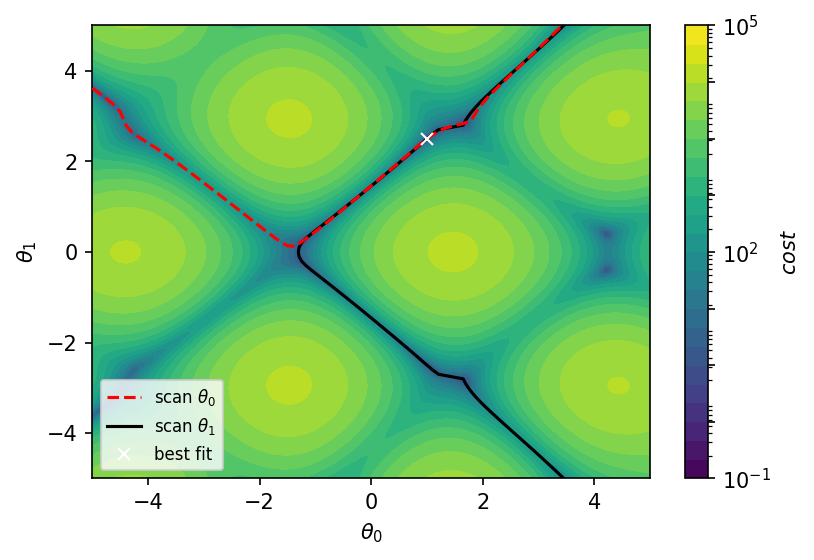

In [6]:
# Plot the profile likelihood paths on top of the cost contour
ax, clb = manifold.plot_cost_contour(Theta0, Theta1, Cost, levels=25, scale="log")
ax.plot(ldata0_default["parameters"][:, 0], ldata0_default["parameters"][:, 1],
         "r--", label=f"scan {param_names[0]}", zorder=10)
ax.plot(ldata1_default["parameters"][:, 0], ldata1_default["parameters"][:, 1],
         "k-", label=f"scan {param_names[1]}")
ax.plot(best_fit[0], best_fit[1], "wx", label="best fit", zorder=20)
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.set_xlabel(param_names[0])
ax.set_ylabel(param_names[1])
clb.set_label(r"$cost$")
plt.legend(fontsize=8)
plt.show()
plt.close()

However, the profile likelihood computation above doesn't find the minima at $\theta_1 \approx \pm 0.5$, $\theta_0 \approx 4$.
Even though these minima has lower cost, the initial guess to the optimization algorithm is closer to the canyon on the left.
As a result, the optimization converges to the canyon on the left.

## Results using multiple starting points

In [7]:
import four_starting_points

# This class generates 4 initial guess' to use in the optimization process.
four_points = four_starting_points.four_points(best_fit)

We need to specify that we want to use `four_points` as our `start_class`.
After the computation is done, the best results, that is the results with lower cost for each fixed parameter value, can be access by calling `likelihood.best_results`.

In [8]:
# Specify the start_class to use
results = likelihood.compute(best_fit, bounds=[-5, 5], start_class=four_points)
likelihood.best_results

{'parameter0': {'error_code': array([2., 2., 2., 2., 2., 2., 2., 2., 4., 4., 4., 4., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,

In [9]:
# Plot the results
ldata0 = likelihood.best_results["parameter0"]
ldata1 = likelihood.best_results["parameter1"]

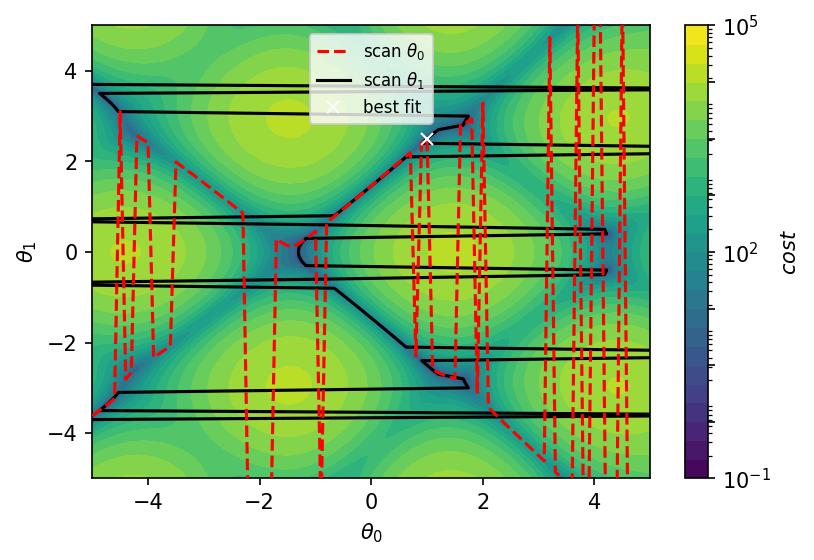

In [10]:
# Plot the profile likelihood paths on top of the cost contour
ax, clb = manifold.plot_cost_contour(Theta0, Theta1, Cost, levels=25, scale="log")
ax.plot(ldata0["parameters"][:, 0], ldata0["parameters"][:, 1],
         "r--", label=f"scan {param_names[0]}", zorder=10)
ax.plot(ldata1["parameters"][:, 0], ldata1["parameters"][:, 1],
         "k-", label=f"scan {param_names[1]}")
ax.plot(best_fit[0], best_fit[1], "wx", label="best fit", zorder=20)
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.set_xlabel(param_names[0])
ax.set_ylabel(param_names[1])
clb.set_label(r"$cost$")
plt.legend(fontsize=8)
plt.show()
plt.close()

From this results, even though the results doesn't look that good do to jumps that occur many times, the profile likelihood computation is able to find the lower local minima.